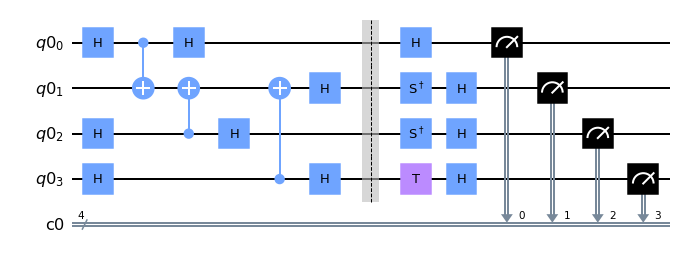

In [1]:
from qiskit import *
qr = QuantumRegister(4)
cr = ClassicalRegister(4)
circuit = QuantumCircuit(qr, cr)
%matplotlib inline
circuit.h(qr[0])
circuit.h(qr[2])
circuit.h(qr[3])
circuit.cx(qr[0],qr[1])
circuit.h(qr[0])
circuit.cx(qr[2],qr[1])
circuit.h(qr[2])
circuit.cx(qr[3],qr[1])
circuit.h(qr[3])
circuit.h(qr[1])

circuit.barrier(qr)

circuit.sdg(qr[1])
circuit.sdg(qr[2])
circuit.h(qr[0])
circuit.h(qr[1])
circuit.h(qr[2])
circuit.t(qr[3])
circuit.h(qr[3])
circuit.measure(qr, cr)
circuit.draw(output='mpl')

In [2]:
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')
qcomp = provider.get_backend('ibmq_athens')
job = execute(circuit, backend=qcomp,shots = 8192)
from qiskit.tools.monitor import job_monitor

In [3]:
job_monitor(job)

Job Status: job has successfully run


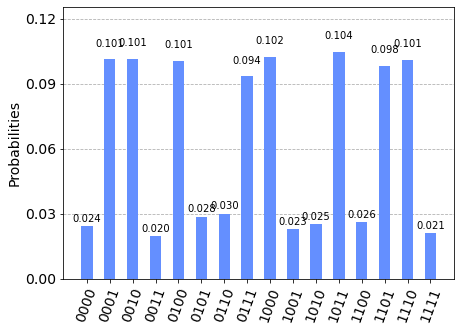

In [4]:
result = job.result()
from qiskit.tools.visualization import plot_histogram
plot_histogram(result.get_counts(circuit))

In [5]:
print((result.get_counts(circuit)['0000']
     +result.get_counts(circuit)['0011']
     +result.get_counts(circuit)['0101']
     +result.get_counts(circuit)['0110']
     +result.get_counts(circuit)['1001']
     +result.get_counts(circuit)['1010']
     +result.get_counts(circuit)['1100']
     +result.get_counts(circuit)['1111']
       
    -(result.get_counts(circuit)['0001']
     +result.get_counts(circuit)['0010']
     +result.get_counts(circuit)['0100']
     +result.get_counts(circuit)['0111']
     +result.get_counts(circuit)['1000']
     +result.get_counts(circuit)['1011']
     +result.get_counts(circuit)['1101']
     +result.get_counts(circuit)['1110'])
      )/8192)

-0.605224609375
